## Decision Tree Classifier



In [103]:
import pandas as pd

df = pd.DataFrame()

df["Fruit"] = ['Apple', 'Orange', 'Apple', 'Orange', 'Orange', 'Apple', 'Orange', 'Apple', 'Orange', 'Apple', 'Orange', 'Orange']
df["Color"] = ['Red', 'Red', 'Red', 'Yellow', 'Green', 'Yellow', 'Red', 'Yellow', 'Red', 'Green', 'Yellow', 'Red']
df["Size"]  = ['Small', 'Small', 'Small', 'Medium', 'Medium', 'Small', 'Medium', 'Large', 'Medium', 'Large', 'Large', 'Small']
df["Sweetness"] = ['Medium', 'Medium', 'High', 'High', 'High', 'Medium', 'Low', 'High', 'Medium', 'High', 'Medium', 'High']

In [104]:
df

,Fruit,Color,Size,Sweetness
0,Apple,Red,Small,Medium
1,Orange,Red,Small,Medium
2,Apple,Red,Small,High
3,Orange,Yellow,Medium,High
4,Orange,Green,Medium,High
5,Apple,Yellow,Small,Medium
6,Orange,Red,Medium,Low
7,Apple,Yellow,Large,High
8,Orange,Red,Medium,Medium
9,Apple,Green,Large,High


In [105]:
y = df['Fruit']
X = df.drop(columns=['Fruit'])

## Hands on Excercise

### Let’s look at how Entropy works mathematically.

Let’s assume we have a dataset of 12 fruits with the following features: “color,” “size,” and “sweetness,” and their corresponding labels as “Apple” or “Orange.” The dataset is as follows:

**Fruit** | **Color** | **Size** | **Sweetness**
---|---|---|---
|Apple|Red|Small|Medium|
|Orange|Red|Small|Medium|
|Apple|Red|Small|High|
|Orange|Yellow|Medium|High|
|Orange|Green|Medium|High|
|Apple|Yellow|Small|Medium|
|Orange|Red|Medium|Low|
|Apple|Yellow|Large|High|
|Orange|Red|Medium|Medium|
|Apple|Green|Large|High|
|Orange|Yellow|Large|Medium|
|Orange|Red|Small| High|

### Now, let’s build the decision tree step by step using Entropy and Gini index:


#### Step 1: Calculate the Entropy of the Whole Dataset:

Formula:

$Entropy(H(parent)) = - p_{i} \sum_{i=1}^{n} log_{2}(p_{i}) $

In [7]:
import numpy as np

total_no_of_apples  = 5
total_no_of_oranges = 7

total_entropy = -((5/12)*np.log2(5/12) +(7/12)*np.log2(7/12))

print(f"Entropy(H(parent)) = {total_entropy}")

Entropy(H(parent)) = 0.9798687566511528


#### Step 2: Calculate Information Gain for “Colour” Feature:

In [9]:
no_of_red_fruits    = 6 # RED   : { Apple: 2, Orange: 4}
no_of_green_fruits  = 2 # GREEN : { Apple: 1, Orange: 1}
no_of_yellow_fruits = 4 # YELLOW: { Apple: 2, Orange: 2}

$Information$ $Gain(Color) = H(parent) - [(\frac{Red}{Total}) * H(Red) + (\frac{Green}{Total}) * H(Green) + (\frac{Yellow}{Total}) * H(Yellow)]$

##### Step 2.1: Calculate Entropy for "Red" Fruits:

In [11]:
entropy_of_red_fruits = -(2/no_of_red_fruits)*np.log2(2/no_of_red_fruits) - (4/no_of_red_fruits)*np.log2(4/no_of_red_fruits)

print(f"Entropy(Red) = {entropy_of_red_fruits}")

Entropy(Red) = 0.9182958340544896


##### Step 2.2: Calculate Entropy for "Green" Fruits:

In [12]:
entropy_of_green_fruits = -(1/no_of_green_fruits)*np.log2(1/no_of_green_fruits) -(1/2)*np.log2(1/no_of_green_fruits)

print(f"Entropy(Green) = {entropy_of_green_fruits}")

Entropy(Green) = 1.0


##### Step 2.3: Calculate Entropy for "Yellow" Fruits:

In [13]:
entropy_of_yellow_fruits = -(2/no_of_yellow_fruits)*np.log2(2/no_of_yellow_fruits) -(2/no_of_yellow_fruits)*np.log2(2/no_of_yellow_fruits)

print(f"Entropy(Yellow) = {entropy_of_yellow_fruits}")

Entropy(Yellow) = 1.0


#### Now, we can calculate the Information Gain for the “Colour” feature:

In [16]:
# Information Gain
IG = total_entropy - ((6/12)*entropy_of_red_fruits + (2/12)*entropy_of_green_fruits + (4/12)*entropy_of_yellow_fruits)

print(f"Information Gain = {IG}")

Information Gain = 0.020720839623908027


#### Step 3: Calculate Information Gain for “Size” Feature:

#### Step 4: Calculate Information Gain for “Sweetness” Feature:



## Complete Code To Calculate the Information Gain of Each Feature

In [36]:
def entropy(col, df):
    entropy_sum = 0
    total = df.shape[0]
    for i in df[col].value_counts():
        entropy_sum += -(i/total)*np.log2(i/total)
    return entropy_sum

In [80]:
target = "Fruit"
parent_entropy = entropy(target, df)

In [81]:
parent_entropy

0.9798687566511528

In [82]:
df[(df['Color']=='Red') & (df['Fruit'] == 'Apple')]

,Fruit,Color,Size,Sweetness
0,Apple,Red,Small,Medium
2,Apple,Red,Small,High


In [83]:
TOTAL = df.shape[0]

for col in X.columns:

    print(col)
    
    entropy_of_class = 0

    for class_in_col in df[col].unique():

        # get only required view of data
        sub_df = df[df[col] == class_in_col].copy()

        # print(sub_df)

        entropy_of_class +=  (sub_df.shape[0]/TOTAL)* entropy(target, sub_df)

    information_gain = parent_entropy - entropy_of_class

    print(f"\tIG({col}):{np.round(information_gain, 4)}")
    
    print()

Color
	IG(Color):0.0207

Size
	IG(Size):0.3457

Sweetness
	IG(Sweetness):0.0753



In [84]:
df

,Fruit,Color,Size,Sweetness
0,Apple,Red,Small,Medium
1,Orange,Red,Small,Medium
2,Apple,Red,Small,High
3,Orange,Yellow,Medium,High
4,Orange,Green,Medium,High
5,Apple,Yellow,Small,Medium
6,Orange,Red,Medium,Low
7,Apple,Yellow,Large,High
8,Orange,Red,Medium,Medium
9,Apple,Green,Large,High


## Decision Tree from sci-kit learn

In [112]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [107]:
y = y.map({'Apple': 0, 'Orange': 1})

In [108]:
X['Color'] = X['Color'].map({'Green': 0, 'Red': 1, 'Yellow': 2})
X['Size'] = X['Size'].map({'Large': 0, 'Medium': 1, 'Small': 2})
X['Sweetness'] = X['Sweetness'].map({'High':0, 'Low': 1, 'Medium': 2})

In [109]:
X

,Color,Size,Sweetness
0,1,2,2
1,1,2,2
2,1,2,0
3,2,1,0
4,0,1,0
5,2,2,2
6,1,1,1
7,2,0,0
8,1,1,2
9,0,0,0


In [114]:
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

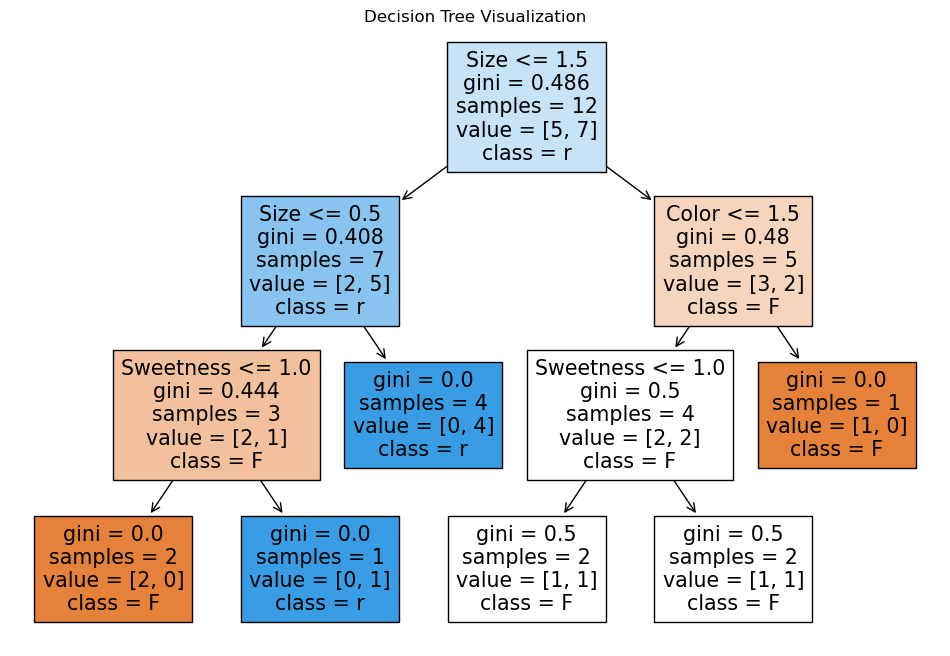

In [117]:
# Step 3: Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=target)
plt.title("Decision Tree Visualization")
plt.show()